In [1]:
import gym
from Q_Agent import Q_Agent
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

In [2]:
env = gym.make('Taxi-v3').env

q_agent = Q_Agent(env)

In [6]:
q_table_0g99, policy_0g99, all_epochs_0g99, acc_return_0g99 = q_agent.train_agent(alpha = 0.01, gamma = 0.99, epsilon = 0.9, max_episode = 20000, policy=None)
q_table_0g9, policy_0g9, all_epochs_0g9, acc_return_0g9 = q_agent.train_agent(alpha = 0.01, gamma = 0.9, epsilon = 0.9, max_episode = 20000, policy=None)
q_table_0g8, policy_0g8, all_epochs_0g8, acc_return_0g8 = q_agent.train_agent(alpha = 0.01, gamma = 0.8, epsilon = 0.9, max_episode = 20000, policy=None)

100%|██████████| 20000/20000 [01:28<00:00, 225.59it/s]


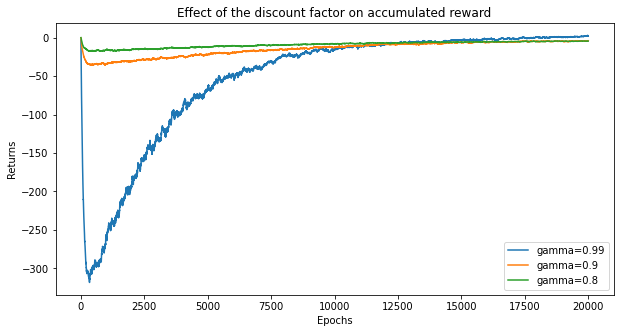

In [7]:
plt.figure(figsize=(10, 5),)
plt.plot(acc_return_0g99)
plt.plot(acc_return_0g9)
plt.plot(acc_return_0g8)
plt.xlabel('Epochs')
plt.ylabel('Returns')
plt.title('Effect of the discount factor on accumulated reward')
plt.legend(['gamma=0.99', 'gamma=0.9', 'gamma=0.8'])
plt.show()

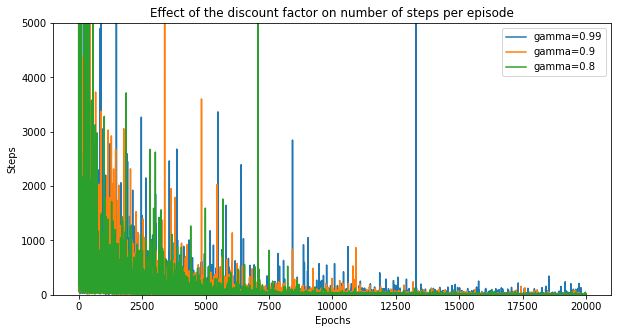

In [22]:
plt.figure(figsize=(10, 5),)
plt.plot(all_epochs_0g8)
plt.plot(all_epochs_0g9)
plt.plot(all_epochs_0g99)
plt.xlabel('Epochs')
plt.ylabel('Steps')
plt.title('Effect of the discount factor on number of steps per episode')
plt.ylim([0, 5000])
plt.legend(['gamma=0.8', 'gamma=0.9', 'gamma=0.99'])
plt.show()

In [14]:
q_table_0a01, policy_0a01, all_epochs_0a01, acc_return_0a01 = q_agent.train_agent(alpha = 0.01, gamma = 0.99, epsilon = 0.9, max_episode = 20000, policy=None)
q_table_0a1, policy_0a1, all_epochs_0a1, acc_return_0a1 = q_agent.train_agent(alpha = 0.1, gamma = 0.99, epsilon = 0.9, max_episode = 20000, policy=None)
q_table_0a5, policy_0a5, all_epochs_0a5, acc_return_0a5 = q_agent.train_agent(alpha = 0.5, gamma = 0.99, epsilon = 0.9, max_episode = 20000, policy=None)

100%|██████████| 20000/20000 [00:53<00:00, 374.41it/s]


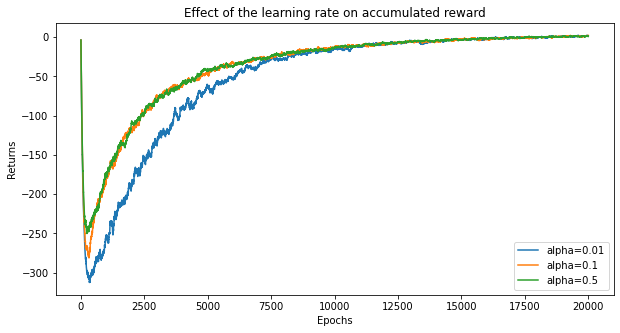

In [15]:
plt.figure(figsize=(10, 5),)
plt.plot(acc_return_0a01)
plt.plot(acc_return_0a1)
plt.plot(acc_return_0a5)
plt.xlabel('Epochs')
plt.ylabel('Returns')
plt.title('Effect of the learning rate on accumulated reward')
plt.legend(['alpha=0.01', 'alpha=0.1', 'alpha=0.5'])
plt.show()

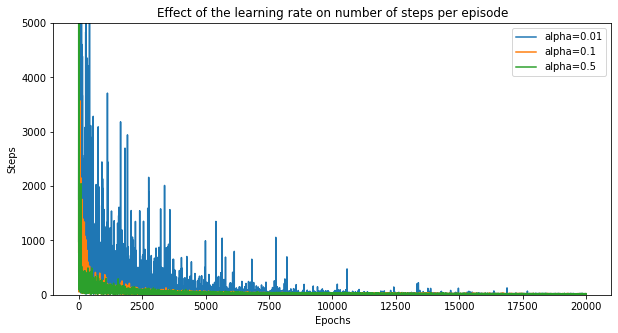

In [23]:
plt.figure(figsize=(10, 5),)
plt.plot(all_epochs_0a01)
plt.plot(all_epochs_0a1)
plt.plot(all_epochs_0a5)
plt.xlabel('Epochs')
plt.ylabel('Steps')
plt.title('Effect of the learning rate on number of steps per episode')
plt.ylim([0, 5000])
plt.legend(['alpha=0.01', 'alpha=0.1', 'alpha=0.5'])
plt.show()

In [19]:
def save_frames_as_gif(frames, path="./", filename='gym_animation.gif'):

    #Mess with this to change frame size
    plt.figure(figsize=(frames[0].shape[1] / 300.0, frames[0].shape[0] / 300.0), dpi=300)

    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    anim.save(path + filename, writer='Pillow', fps=5)

MovieWriter Pillow unavailable; using Pillow instead.


Results after 5 episodes:
Average timesteps per episode: 10.0
Average penalties per episode: 0.0


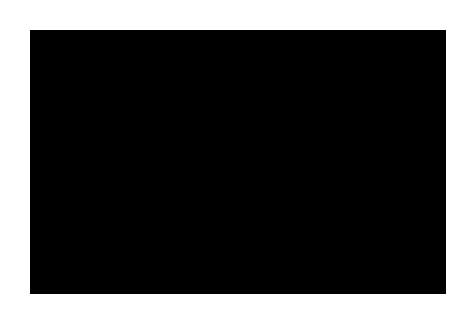

In [21]:
# Evaluate agent's performance after Q-learning
total_epochs, total_penalties = 0, 0
episodes = 5
frames = []
for _ in range(episodes):
    state = env.reset()
    frames.append(env.render(mode="rgb_array"))
    epochs, penalties, reward = 0, 0, 0

    done = False

    while not done:
        action = policy_0a1[state]
        state, reward, done, info = env.step(action)
        frames.append(env.render(mode="rgb_array"))
        # time.sleep(0.1)
        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

    for end_frame in range(5):
        frames.append(np.zeros(np.shape(frames[0])))

save_frames_as_gif(frames,filename='Taxi_Q.gif')

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

In [ ]:
env.close()